# homework


#### Q) Add codes to get the data from http://finance.naver.com/item/sise_day.nhn?code=005930'

In [7]:
from pandas.io.parsers import TextParser
from lxml.html import parse
from urllib.request import urlopen

### put your codes here
url = 'http://finance.naver.com/item/sise_day.nhn?code=005930'

def _unpack(row, kind='td'):
    elts = row.findall('.//%s' % kind)
    return [val.text_content() for val in elts]

def parse_options_data(table):
    rows = table.findall('.//tr')
    header = _unpack(rows[0], kind = 'th')
    data = [_unpack(r) for r in rows [1:]]
    return TextParser(data, names=header).get_chunk()

parsed = parse(urlopen(url))
doc = parsed.getroot()
table = doc.findall('.//table')

stock_SM = parse_options_data(table[0])
stock_SM

,날짜,종가,전일비,시가,고가,저가,거래량
0,2020.04.29,"50,000",\n\t\t\t\t\n\t\t\t\t100\n\t\t\t\t\n\t\t\t,"49,900","50,500","49,600","15,558,753"
1,2020.04.28,"50,100",\n\t\t\t\t\n\t\t\t\t250\n\t\t\t\t\n\t\t\t,"49,850","50,100","49,300","16,095,399"
2,2020.04.27,"49,850",\n\t\t\t\t\n\t\t\t\t500\n\t\t\t\t\n\t\t\t,"49,350","50,000","49,100","14,049,471"
3,2020.04.24,"49,350",\n\t\t\t\t\n\t\t\t\t500\n\t\t\t\t\n\t\t\t,"49,650","49,750","49,000","15,618,347"
4,2020.04.23,"49,850",\n\t\t\t\t0\n\t\t\t,"50,200","50,300","49,500","18,754,442"
5,2020.04.22,"49,850",\n\t\t\t\t\n\t\t\t\t600\n\t\t\t\t\n\t\t\t,"48,700","50,000","48,350","18,613,864"
6,2020.04.21,"49,250",\n\t\t\t\t\n\t\t\t\t850\n\t\t\t\t\n\t\t\t,"49,400","49,700","48,700","27,407,543"
7,2020.04.20,"50,100","\n\t\t\t\t\n\t\t\t\t1,300\n\t\t\t\t\n\t\t\t","51,400","51,400","50,000","21,866,354"
8,2020.04.17,"51,400","\n\t\t\t\t\n\t\t\t\t2,400\n\t\t\t\t\n\t\t\t","50,800","52,000","50,300","32,041,675"
9,2020.04.16,"49,000",\n\t\t\t\t0\n\t\t\t,"49,350","49,350","48,550","23,349,760"


### Q) Using the visualization methods explained in the class, please draw at least three graphs (e.g. bar chart, pie chart, scatter plot, etc.)

In [8]:
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

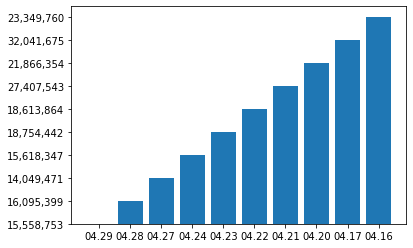

In [9]:
# chart1
plt.bar([i[5:] for i in stock_SM.날짜], stock_SM.거래량)

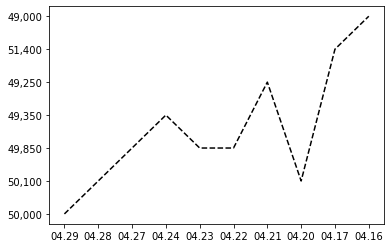

In [10]:
# chart2
plt.plot([i[5:] for i in stock_SM.날짜], stock_SM.종가, 'k--')

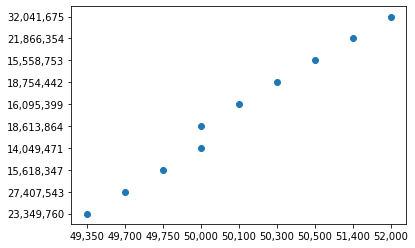

In [11]:
# chart3
modi_SM = stock_SM.sort_values(by = '고가')
plt.scatter(modi_SM.고가, modi_SM.거래량)